# ÖRNEK 1

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img_path = "/content/yolresmi.jpeg"
img = cv2.imread(img_path)
print(img.shape) #resmin piksel boyutları
# Okuma işlemi gerçekleştikten sonra boyutlarını yazdırmak istediğimizde 960x1280x3 sonucunu görürüz.
# Yani resmin boyutları kadar bir matris oluşturuldu ve bu matrise resmin her pikselinin değerleri atandı.
# Resim renkli olduğu için de RGB’ den gelen 3 boyut vardır.

(589, 786, 3)


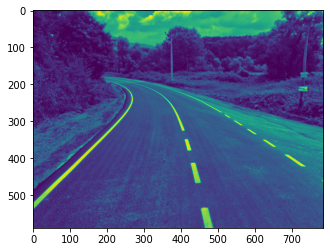

(589, 786)


In [ ]:
# Bu fonksiyon sonucunda oluşan değişikliği görmek istersek matplotlib içerisinden imshow fonksiyonunu kullanırız.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()
print(gray_image.shape)

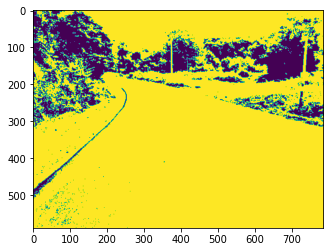

In [ ]:
#Bazı durumlarda bu matrisin yalnızca 0 ve 255 değerlerinden oluşmasını isteyebiliriz.Böyle durumlarda threshold fonksiyonu kullanılmaktadır.
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY) #(işlem yapılacak resim, eşik değer, bu eşik değeri geçen matris elemanlarının atanmasını istediğimiz değer, )
plt.imshow(blackAndWhiteImage)
plt.show()
# İlk resimde (1.Resim) eşik değer 20 olarak belirlendi. 20 üzerindeki bütün değerlere 255 atandı. Kalan değerlerse 0 olarak belirlendi.
# Bu da yalnızca siyah veya siyaha yakın çok koyu renklerin resimde kalmasını diğer bütün tonların doğrudan beyaz olmasını sağladı.

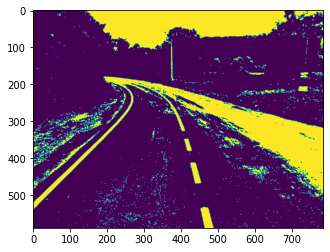

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)
plt.show()

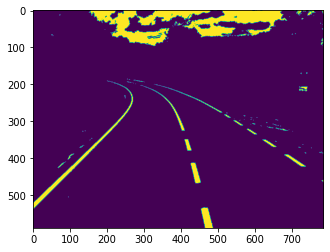

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)
plt.show()

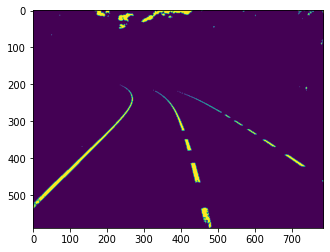

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)
plt.show()

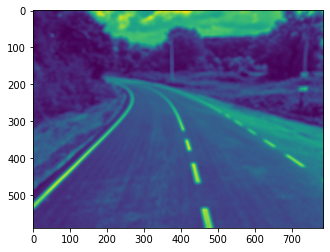

In [ ]:
# bulanıklaştırma
output2 = cv2.blur(gray_image, (10, 10))
plt.imshow(output2)
plt.show()

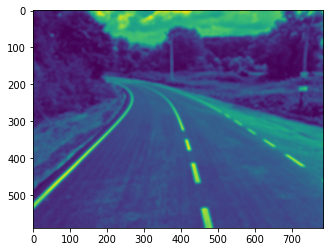

In [ ]:
output2 = cv2.GaussianBlur(gray_image, (9, 9), 5)
plt.imshow(output2)
plt.show()

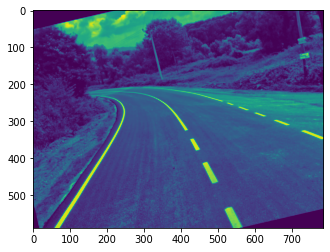

In [ ]:
# Elimizdeki verileri bazı durumlarda döndürerek kullanmak isteyebiliriz. Ya da veri olarak kullanılacak resimler eğik olabilir.
# Bu gibi durumlarda aşağıdaki fonksiyonlar kullanılabilir.
(h, w) = img.shape[:2]
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 13, scale  =1.1) #(hesapladığımız merkez değerleri, açı değeri, döndürme işlemi sonucunda ölçekleme değeri)
rotated = cv2.warpAffine(gray_image, M, (w, h))
plt.imshow(rotated)
plt.show()

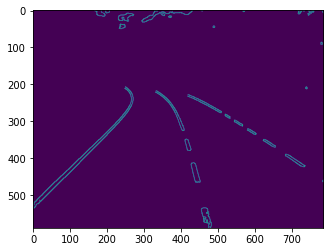

In [ ]:
#  Canny kenar tanıma (edge detection) işlemi
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 3)
output2 = cv2.Canny(output2, 180, 255) #(işlemin uygulanacağı resim, düşük eşik değeri, yüksek eşik değeridir)
plt.imshow(output2)
plt.show()

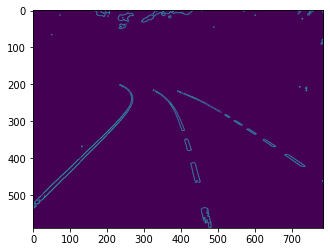

In [ ]:
# GaussianBlur etkisini daha iyi gözlemleyebilmek adına aynı işlemleri bu defa herhangi bir bulanıklaştırma olmadan yapalım.
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2)
plt.show()

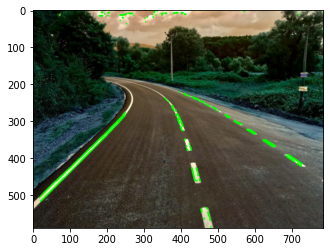

In [ ]:
# Bu aşamadan sonra belirlenen kenarlar esas alınarak gerçek resim üzerine işlemler yapılır. Bunun için HoughLinesP ve line fonksiyonları kullanılmıştır.
lines = cv2.HoughLinesP(output2, 1, np.pi/180,30)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(img)

In [ ]:
# Yukarıdaki şekilde bulutlar da yol sınırı olarak algılanmıştır. Bu problemlerin önüne geçebilmek için maskeleme yönteminin kullanılması gerekir
def mask_of_image(image):
    height = image.shape[0]
    polygons = np.array([[(0,height),(2200,height),(250,100)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

In [ ]:
# Yukarıdaki mask_of_image fonksiyonu ile maskeleme işlemini yapabiliriz. 
# Öncelikle maskelemek istediğimiz alanı poligon olarak belirleriz. 
# Buradaki parametre değerleri tamamen veriye özel değerlerdir.
# Şekil 10' daki maske gerçek resim üzerine uygulanır. 
# Gerçek resimde siyah alana karşılık gelen yerlere herhangi bir işlem uygulanmazken, beyaz alana karşılık gelen yerlere yukarıdaki işlemlerin tamamı uygulanır. 
# Bu işlem de bitwise_and fonksiyonu ile gerçekleştirilir.

### Maskeleme uygulanacak alan :

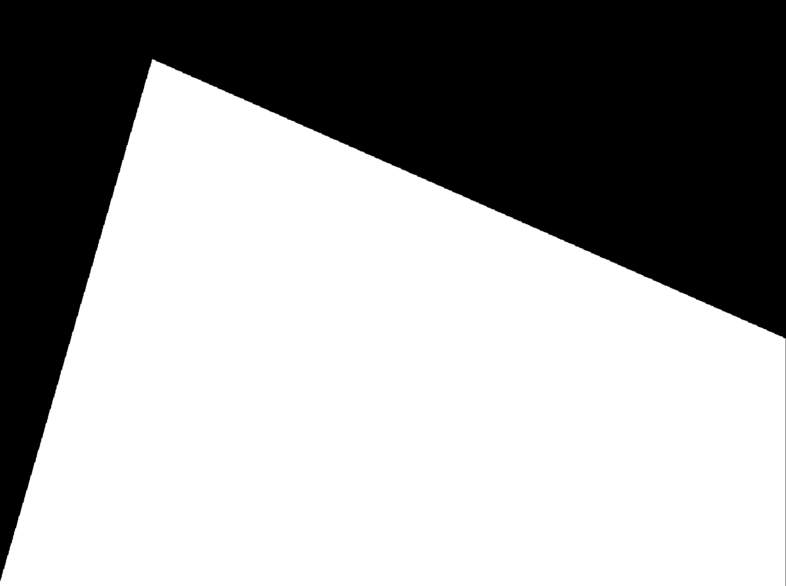

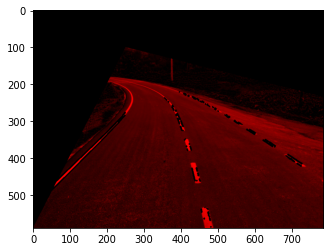

In [ ]:
son_img = mask_of_image(img)
plt.imshow(son_img)
plt.show()


# ÖRNEK 2

Aşağıdaki şekildeki madeni paraları tanıyan bir görüntü işleme süreci oluşturalım:

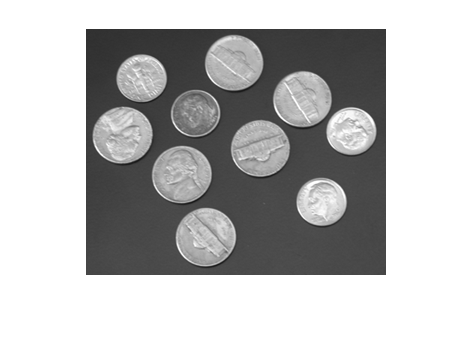

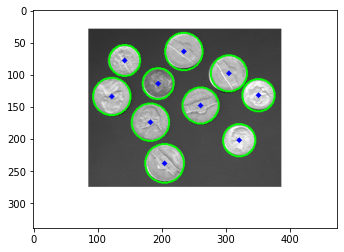

In [ ]:
img = cv2.imread("/content/para_resmi.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #siyah-beyaz yap
(thresh, output2) = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY) #threshold fonksiyonu
output2 = cv2.GaussianBlur(output2, (5, 5), 1) #Bulanıklaştırma işlemi
output2 = cv2.Canny(output2, 180, 255)  #Canny ile kenar tanıma işlemi tamamlanır
plt.imshow(output2, cmap = plt.get_cmap("gray"))
circles = cv2.HoughCircles(output2,cv2.HOUGH_GRADIENT,1,10,  #HoughCircles ile sınırları belirlenen daireler çiz                     
          param1=180,param2=27,minRadius=20,maxRadius=60)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(img)

# ÖRNEK 3

Görüntü işleme, aynı zamanda görüntü formatındaki yazılara da uygulanmaktadır.
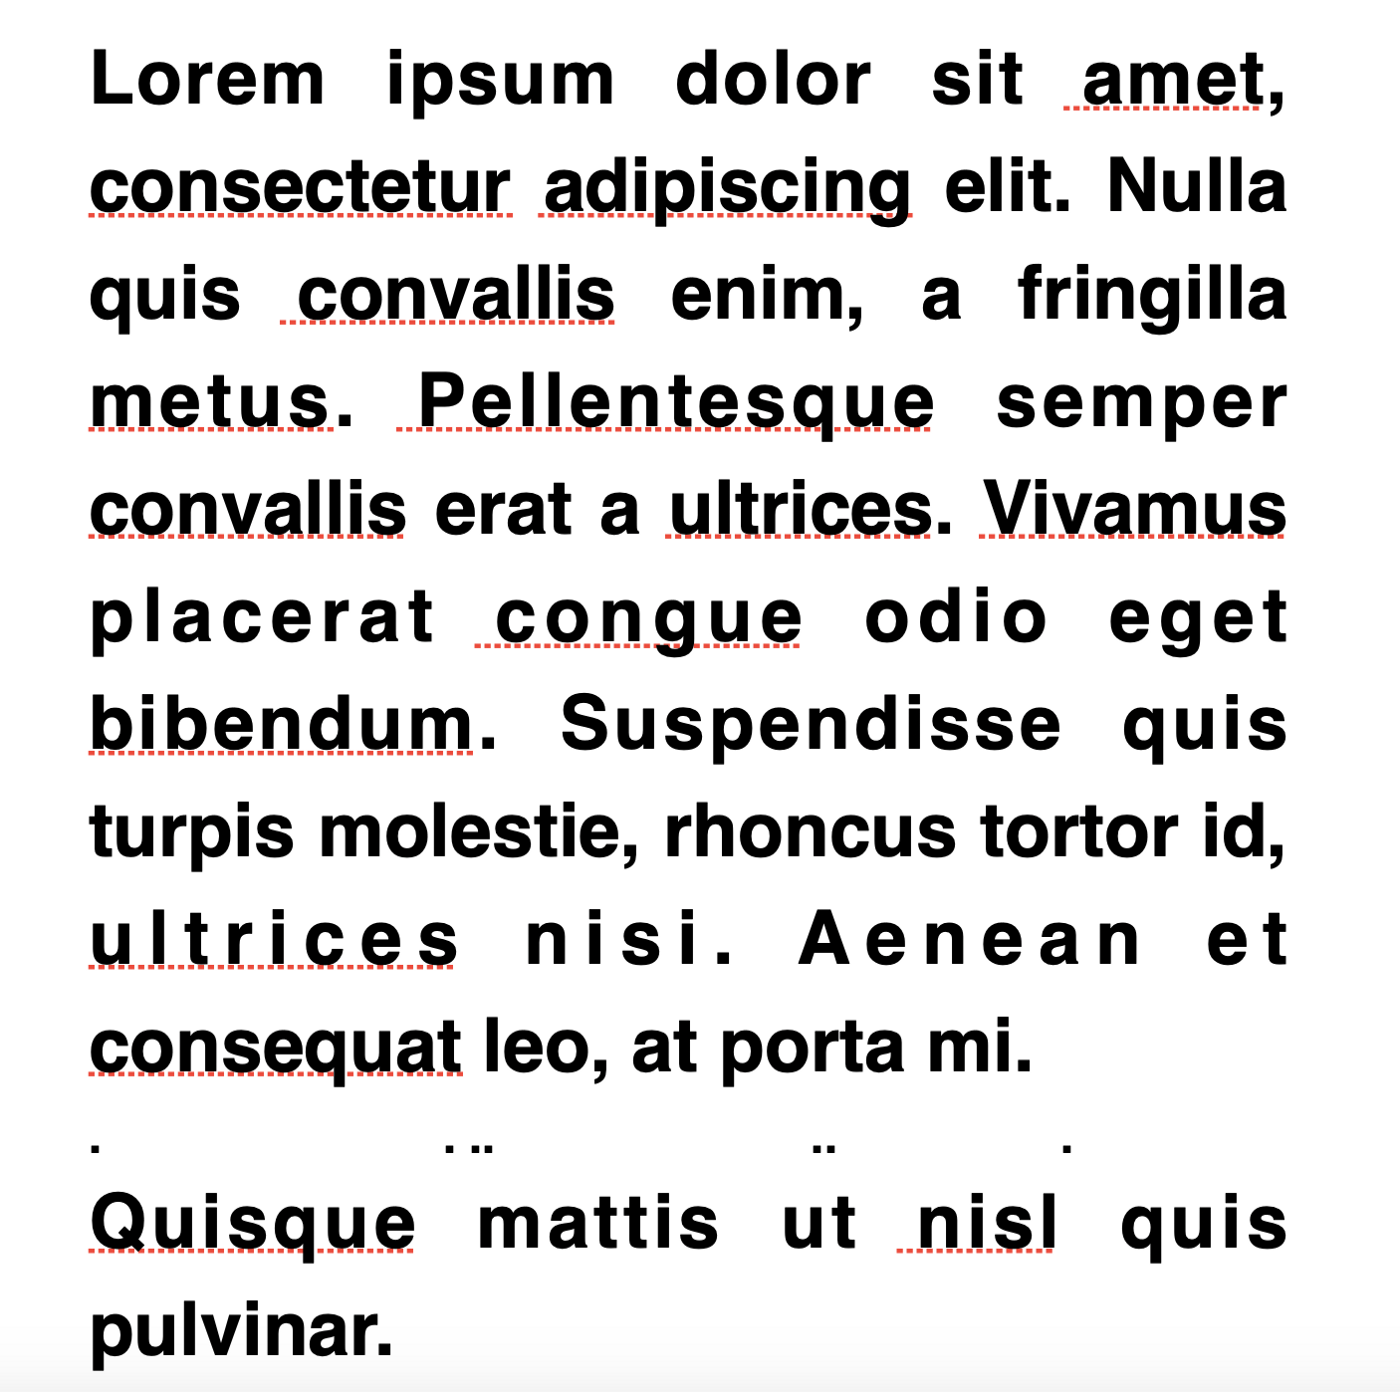

Bütün kelimelerin veya istenen bazı spesifik kelimelerin eğitim sonucunda modelimiz tarafından tespit edilmesini istiyoruz. Bunun için kelimelerin pozisyon bilgilerinin sisteme öğretmemiz gerekebilir. Bu gibi problemlerde de OpenCV kütüphanesi kullanılmaktadır.

Öncelikle yukarıda verilen şekildeki veri yazıya çevirilir. Bunun için **Tesseract** isimli optik karakter tanıma motoru kullanılır.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
import shutil
import os
import random
from pytesseract import Output

In [ ]:
img = cv2.imread("/content/yazı_resmi.png")


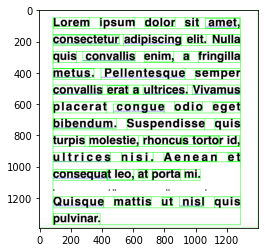

In [ ]:
data = pytesseract.image_to_data(img, output_type=Output.DICT, config = "--psm 6")
n_boxes = len(data['text'])
for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)
plt.show()
# Sonuç olarak her bir kelime ve her kelime bloğu çevçeve içerisine alınmıştır.


Örnek-1 ve Örnek-2'deki bulanıklaştırmayı yazı için yaptığımızda bu yazının kalitesini ve haliyle okunabilirliğini kötü yönde etkileyecektir. Bu sebeple, bu örnek için farklı bir bulanıklaştırma fonksiyonu olan **medianblur** kullanılacaktır.

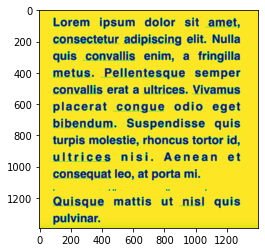

In [ ]:
img = cv2.imread("/content/yazı_resmi.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output2 = cv2.medianBlur(gray_image, ksize=5)
plt.imshow(output2)
plt.show()

**Erode** ve **Dilate** fonksiyonları da görüntü formatındaki yazıların gürültülerinden kurtulmak veya yazının kalitesini artırmak için kullanılabilir.

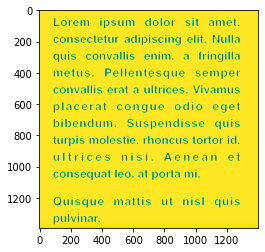

In [ ]:
kernel = np.ones((3,3),np.uint8)
output2 = cv2.dilate(gray_image,kernel,iterations = 3)
plt.imshow(output2)
plt.show()

**Erode** fonksiyonu ise **dilate** fonksiyonunun tersine yazının kalınlaşmasını sağlar.

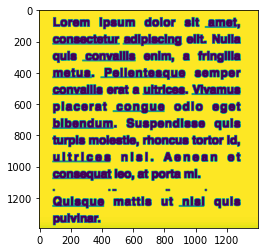

In [ ]:
kernel = np.ones((3,3),np.uint8)
output2 = cv2.erode(gray_image,kernel,iterations = 3)
plt.imshow(output2)
plt.show()

# ÖRNEK 4
Bazı resimlerin kalitelerini artırmak için de *OpenCV* kütüphanesi kullanılmaktadır. Kontrastı kötü olan resimlerin histogram değerleri dar bir alana yayılmış durumdadır. Bu resmin kontrastını iyileştirebilmek için histogram değerlerini geniş bir bölgeye yaymak gerekir. Bu işlemler için *OpenCV* kütüphanesi içerisindeki **equalizeHist** fonksiyonu kullanılır. Aşağıdaki şekildeki resim için histogram düzenlemesi yapalım.
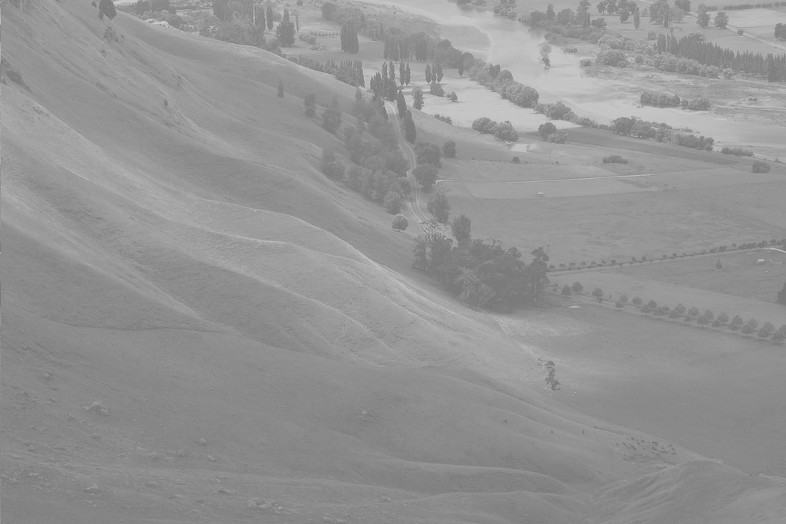

Yukaridaki görselin histogram grafiği :
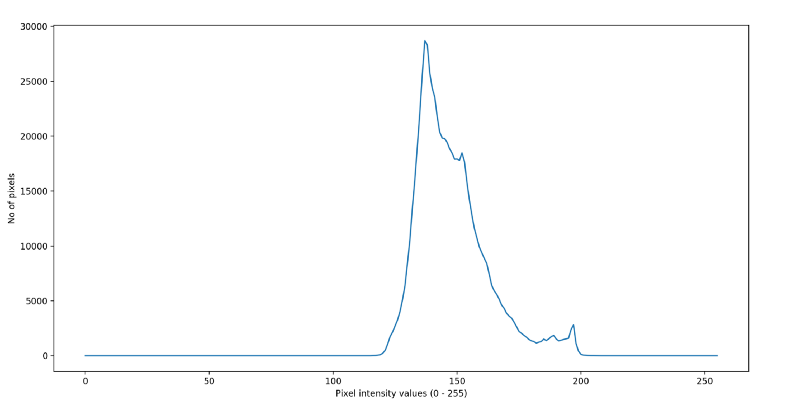

Resimdeki objelerin görünebilirliği düşük seviyededir.

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

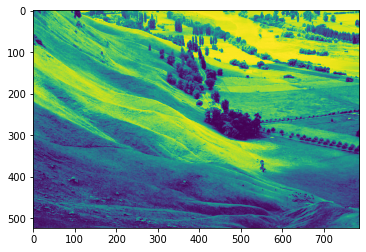

In [ ]:
img = cv2.imread("/content/gri_resim.jpeg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray_image)
plt.imshow(equ)